In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv("Kharkiv.csv")

In [13]:
print(data.describe())

               min          max       median
count  1023.000000  1023.000000  1023.000000
mean      2.242502    21.392180     5.617674
std       2.107491    24.811877     4.074624
min       0.000000     1.500000     0.500000
25%       0.850000     9.010000     2.665000
50%       1.600000    15.100000     4.500000
75%       3.010000    25.200000     7.450000
max      16.300000   516.660000    36.570000


In [14]:
data['date'] = pd.to_datetime(data['date'])

In [15]:
data

,date,min,max,median
0,2021-03-01,1.52,22.20,6.85
1,2021-03-02,2.52,16.02,6.45
2,2021-03-03,0.20,13.80,1.30
3,2021-03-04,4.22,20.77,11.57
4,2021-03-05,3.75,29.52,9.32
...,...,...,...,...
1018,2024-05-04,0.50,15.00,1.90
1019,2024-05-05,0.80,16.80,1.50
1020,2024-05-06,0.90,8.80,1.80
1021,2024-05-07,0.60,11.30,2.40


In [6]:
data = data.set_index('date')

In [7]:
print(data.loc[data["median"] == data["median"].max()])
print(data.loc[data["median"] == data["median"].min()])

            min    max  median
date                          
2021-11-17  6.3  96.95   36.57
             min   max  median
date                          
2021-09-03  0.17  3.52     0.5
2023-10-09  0.10  4.90     0.5


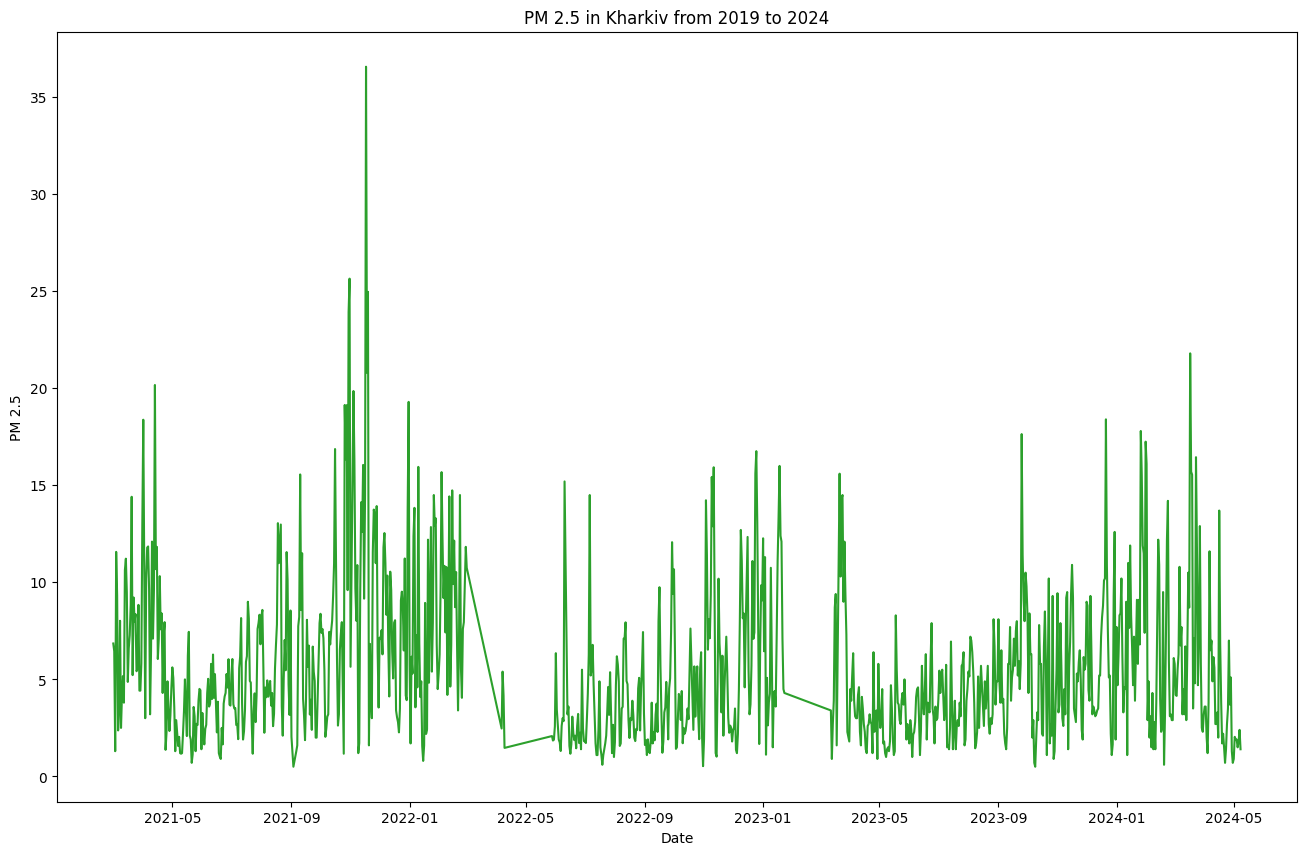

In [8]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(data.index, data["median"], color='tab:green')
plt.gca().set(title="PM 2.5 in Kharkiv from 2019 to 2024", xlabel='Date', ylabel="PM 2.5")
plt.show()

<Axes: xlabel='date'>

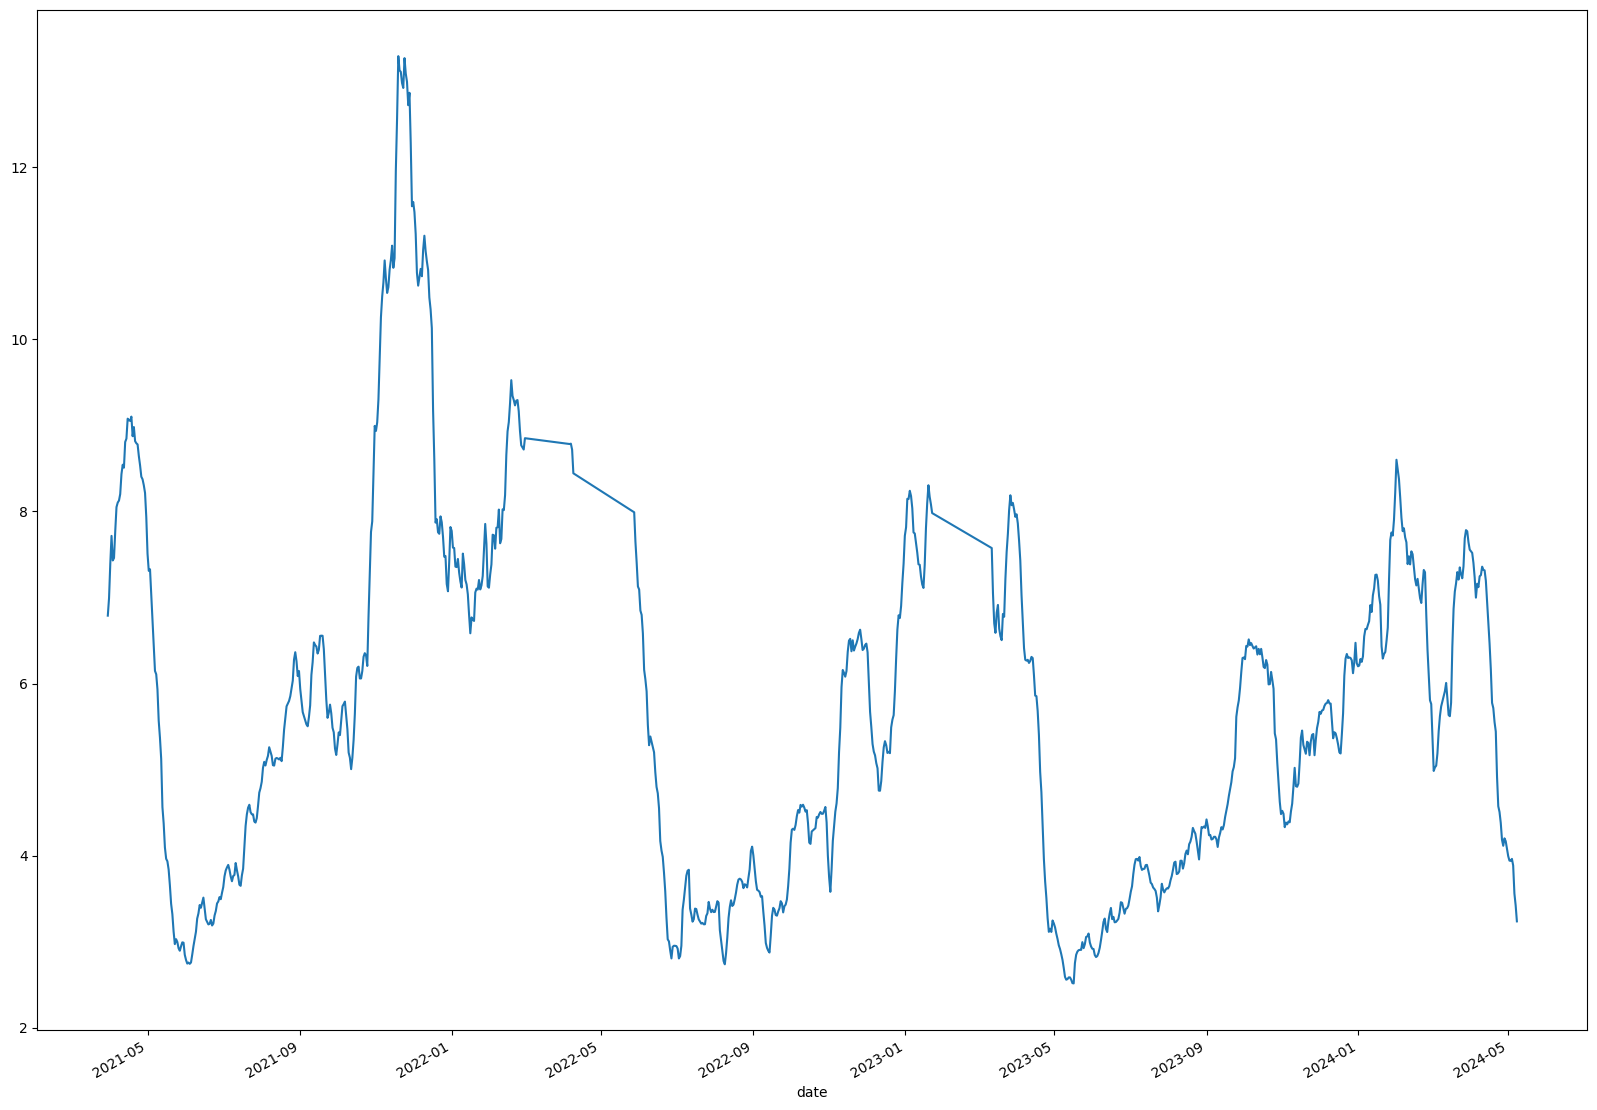

In [9]:
data = data["median"].rolling(window=30).mean()
data.plot(figsize=(20,15))

In [16]:
data.drop(['min', 'max' ], axis=1, inplace=True)

In [17]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
print(data.loc[data["median"] == data["median"].max()])
print(data.loc[data["median"] == data["median"].min()])

          date  median
257 2021-11-17   36.57
          date  median
184 2021-09-03     0.5
812 2023-10-09     0.5


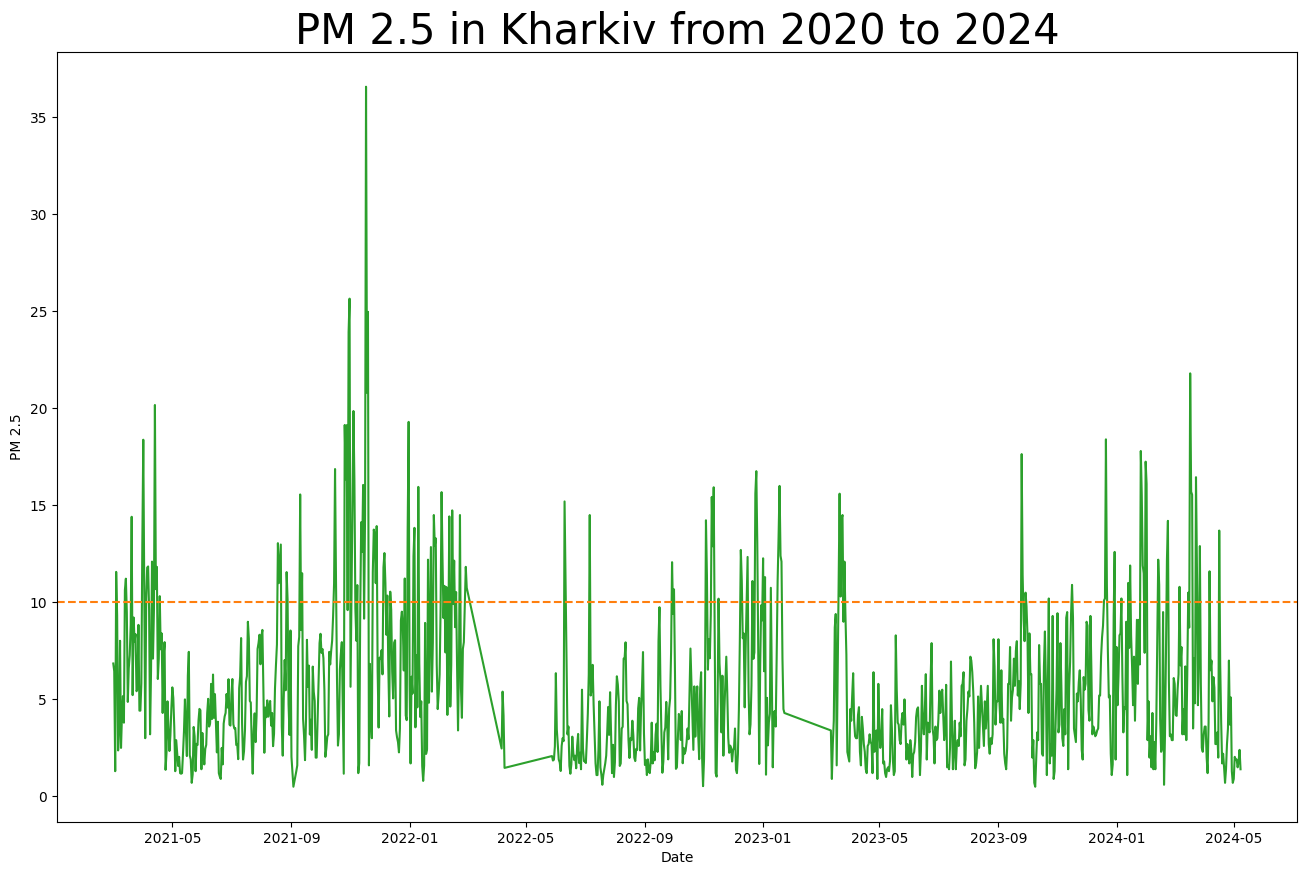

In [28]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(data.index, data["median"], color='tab:green', label='Median PM 2.5')
plt.gca().set(xlabel='Date', ylabel="PM 2.5")
plt.title("PM 2.5 in Kharkiv from 2020 to 2024", fontsize=30)
plt.axhline(y=10, color='tab:orange', linestyle='--', label='PM 2.5 = 25')
plt.show()

In [22]:
data

,date,median
0,2021-03-01,6.85
1,2021-03-02,6.45
2,2021-03-03,1.30
3,2021-03-04,11.57
4,2021-03-05,9.32
...,...,...
1018,2024-05-04,1.90
1019,2024-05-05,1.50
1020,2024-05-06,1.80
1021,2024-05-07,2.40


In [23]:
data = data.set_index('date')

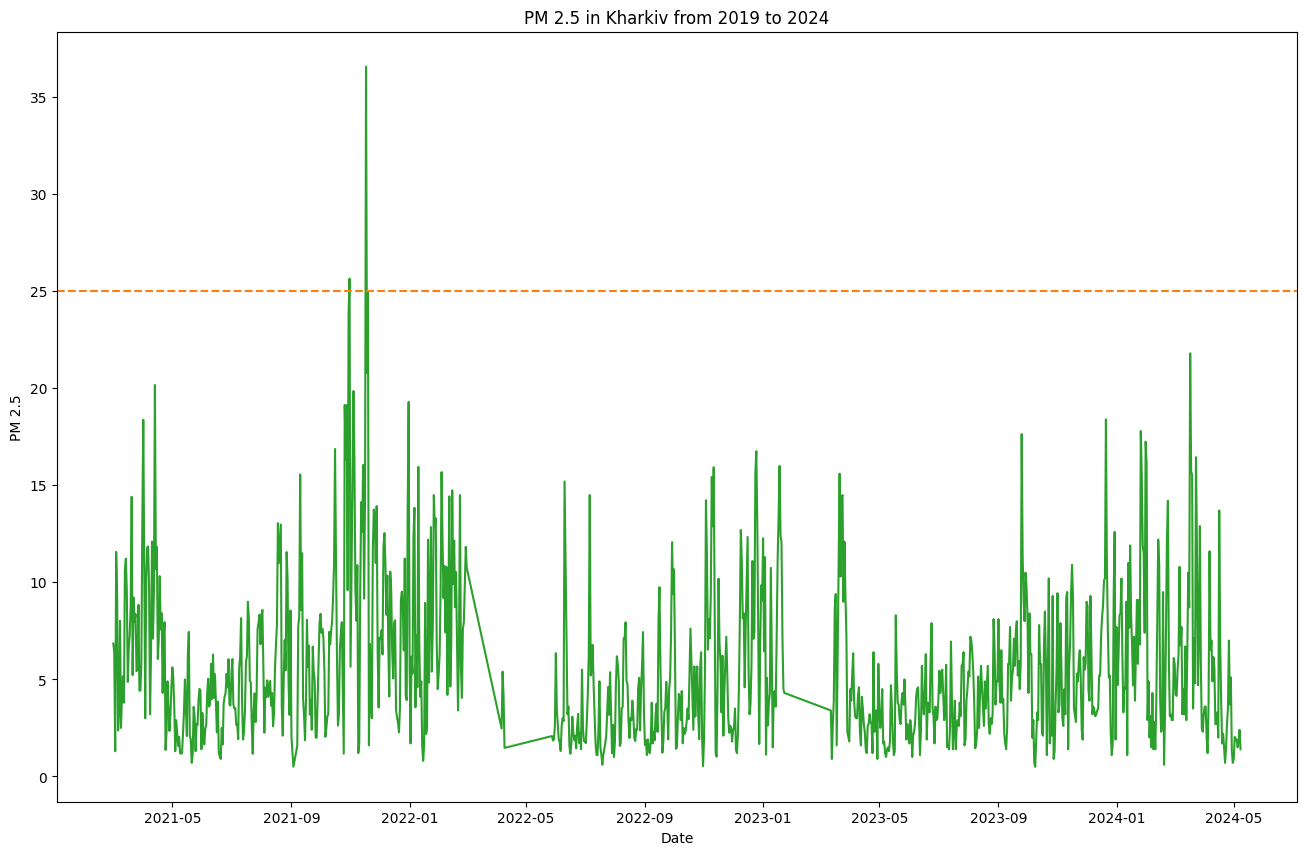

In [24]:
plt.figure(figsize=(16,10), dpi=100)
plt.plot(data.index, data["median"], color='tab:green', label='Median PM 2.5')
plt.gca().set(title="PM 2.5 in Kharkiv from 2019 to 2024", xlabel='Date', ylabel="PM 2.5")
plt.axhline(y=25, color='tab:orange', linestyle='--', label='PM 2.5 = 25')
plt.show()

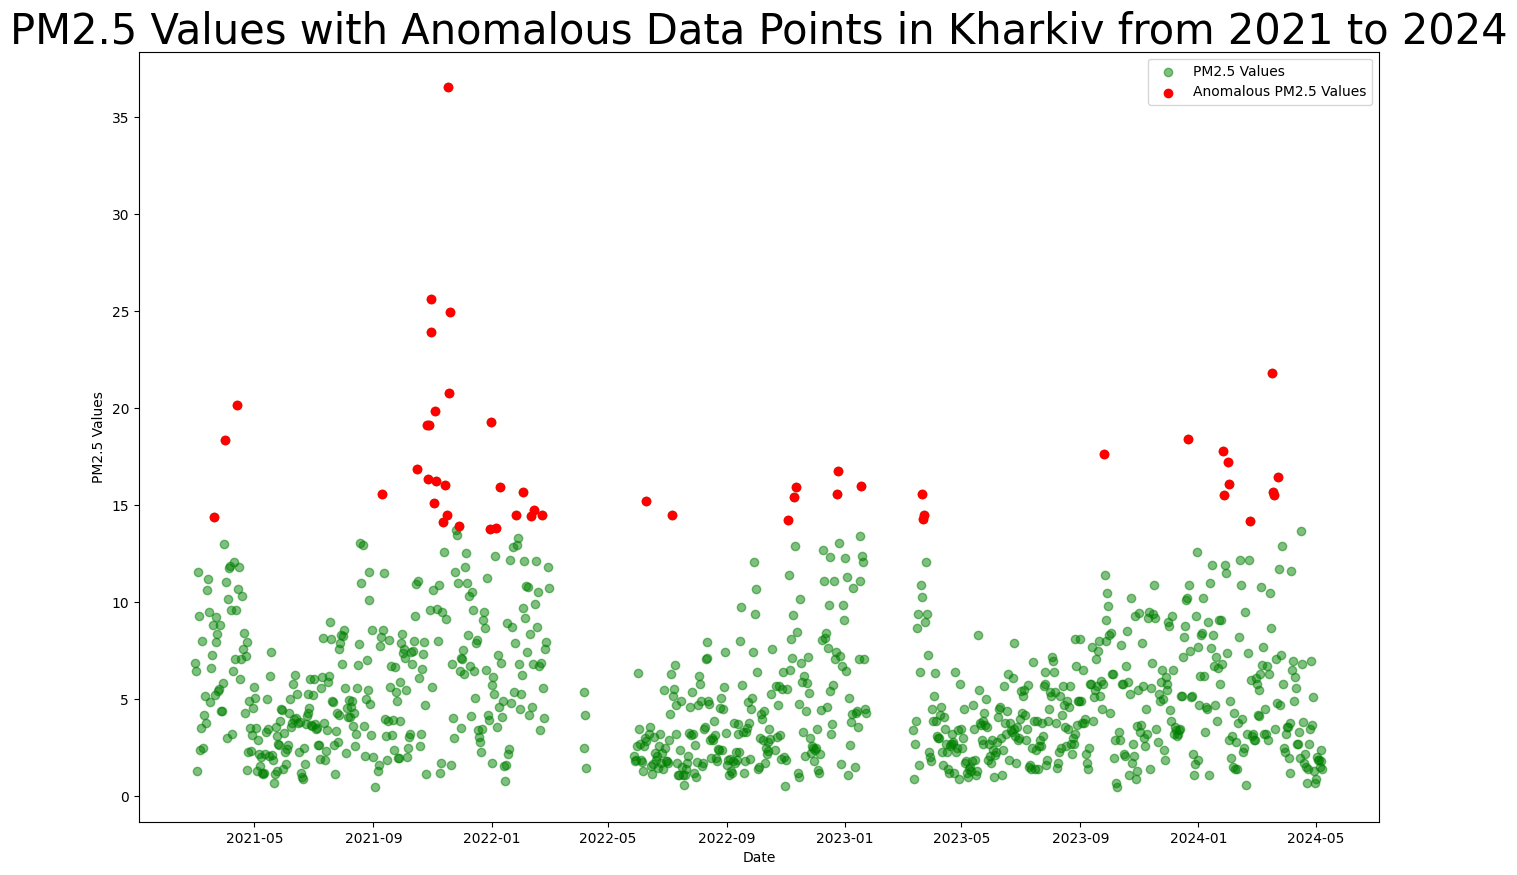

In [29]:
import matplotlib.pyplot as plt
from scipy import stats

data['z_score'] = stats.zscore(data["median"])
z_score_threshold = 2
anomalous_pm25_data = data[abs(data['z_score']) > z_score_threshold]

# Create the figure
plt.figure(figsize=(16, 10), dpi=100)

plt.scatter(data.index , data['median'], label='PM2.5 Values', color='green' ,  alpha=0.5)
plt.scatter(anomalous_pm25_data.index,  anomalous_pm25_data['median'], label='Anomalous PM2.5 Values', color='red'  )
plt.xlabel('Date')
plt.ylabel('PM2.5 Values')
plt.title('PM2.5 Values with Anomalous Data Points in Kharkiv from 2021 to 2024', fontsize=30)
plt.legend()
plt.show()

